# First ML pipeline for the prefer challenge

## loading packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector as selector

## reading in the data and exploring

Some information about the data:
Features that can be used for the first simple models: gender, age, education level, current partnership status, health, religion, fertility intentions


In [4]:
data = pd.read_csv('../data-subset/LISS_2020_ML_training/PreFer_train_data_only_2020_vars.csv')
target = pd.read_csv('../data-subset/LISS_2020_ML_training/PreFer_train_outcome.csv', encoding='cp1252')

C:\Users\nicwa\AppData\Local\Temp\ipykernel_21784\2103117567.py:1: DtypeWarning: Columns (286,287,288,289,389,391,451,452,453,454,520,521,522,523,564,694,695,696,697,756,834,853,854,931,932,933,934,1089,1090,1091,1092,1167,1220,1224,1225,1241,1242,1243,1265,1284,1285,1286,1287,1288,1289,1290,1291,1292,1293,1294,1295,1325,1328,1341,1342,1343,1344,1349,1350,1351,1352,1353,1358,1359,1360,1361,1362,1363,1373,1392,1458,1464,1490,1619,1629,1639,1649,1659,1667,1668,1669,1670,1725,1751,1752,1753,1754,1755,1756,1757,1758,1759,1760,1761,1762,1763,1772,1780,1856,1894,1930,1934,1938,1942,1946,1950,1998,1999,2000,2001) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data-subset/LISS_2020_ML_training/PreFer_train_data_only_2020_vars.csv')


In [6]:
#inpsecting the read in data
display(data.head())
display(target.head())

,nomem_encr,outcome_available,cf20m_m,cf20m001,cf20m002,cf20m003,cf20m004,cf20m005,cf20m007,cf20m008,...,nettohh_f_2020,nettoink_2020,nettoink_f_2020,oplcat_2020,oplmet_2020,oplzon_2020,partner_2020,sted_2020,woning_2020,woonvorm_2020
0,712619,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,706448,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3263.0,1251.0,1251.0,3.0,3.0,3.0,1.0,1.0,1.0,3.0
2,729145,0,202009.0,2.0,2009.0,1.0,45.0,1939.0,1.0,NaN,...,8500.0,4250.0,4250.0,6.0,6.0,6.0,1.0,1.0,1.0,3.0
3,729424,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,715619,1,202009.0,16.0,NaN,1.0,30.0,1964.0,1.0,NaN,...,NaN,NaN,NaN,4.0,4.0,5.0,1.0,3.0,1.0,2.0


,nomem_encr,new_child
0,712619,NaN
1,706448,NaN
2,729145,NaN
3,729424,NaN
4,715619,0.0


0
(6418, 2291)
[dtype('int64') dtype('float64') dtype('O')]
nomem_encr            0.000000
outcome_available     0.000000
cf20m_m              72.187597
cf20m001             72.187597
cf20m002             92.567778
                       ...    
oplzon_2020          54.206918
partner_2020         54.206918
sted_2020            55.204113
woning_2020          54.954815
woonvorm_2020        54.206918
Length: 2291, dtype: float64


<Axes: >

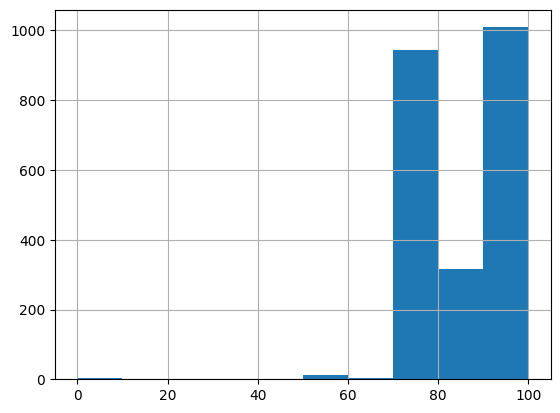

In [8]:
# check the ordering of the data
print(sum(data['nomem_encr'] != target['nomem_encr'])) # ordering is the same
print(data.shape) #6418 cases and 2291 features
print(np.unique(pd.DataFrame(data.dtypes))) # integers, floats, and objects
col_nan_count = ((data.isna().sum(axis=0))/len(data))*100
print(col_nan_count) # alot of missing data
col_nan_count.hist()

count    987.000000
mean       0.214792
std        0.410886
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: new_child, dtype: float64

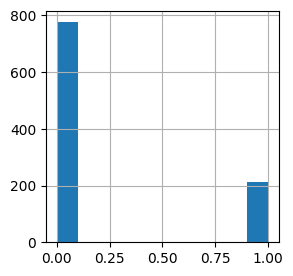

In [10]:
display(target['new_child'].describe())
_=target['new_child'].hist(figsize=(3,3))

# the outcome varibale is quite imbalenced

## preprocessing the data

1. select variables
2. drop missing values
3. split data
4. scale and encode data


- feature selection
- feature scaling
- encoding of categorical predictors

gender, age, education level, current partnership status, health, religion, fertility intentions
gender_imp, oplmet (highest level of education with diploma), burgstat (civil status), woonvorm (domestic status), 

aantalki (number of children living in the house), 
sted (urban character of place of residence) , 
netinc (personal net income), 
ch07a004 - ch20m004 (how would you describe your health generally speaking), 
cr08a012 - cr18k012 (do you consider yourself a member of a certain religion?)

cw08a439- cw20m439: do you currently have children younger than 8 ? (don't inlcude for now)

cf08a035; cf09b035; cf10c035; cf11d035; cf12e035; cf13f035; cf14g035: have you had any children? (not now)

cf08a036; cf09b036; cf10c036; cf11d036; cf12e036; cf13f036; cf14g036: how many children in total do you have?

cf08a128; cf09b128; cf10c128; cf11d128; cf12e128; cf13f128; cf14g128; cf15h128; cf16i128; cf17j128; cf18k128; cf19l128; cf20m128
Do you think you will have children in the future? -- AND -- Do you think you will have [more] children in the future?

cf08a129; cf09b129; cf10c129; cf11d129; cf12e129; cf13f129; cf14g129; cf15h129; cf16i129; cf17j129; cf18k129; cf19l129; cf20m129
How many children do you think you will have in the future?" -- AND -- How many children do you think you will have in the future? -- AND -- How many [more] children do you think you will have in the future?


ch08b006; ch09c006; ch10d006; ch11e006; ch12f006; ch13g006; ch15h006; ch16i006; ch17j006; ch18k006; ch19l006; ch20m006
How would you rate your chance of living to be 75 years old or older? -- AND --  How would you rate your chance of living to be 75 years old or older?

In [123]:
variable_selection_ind = ['gender_imp', 
                      'age_imp', 'oplmet', 
                      'burgstat', 'woonvorm',
                      'sted', 'netinc']

healthRange = ['ch0%sa004'%num if num <10 else 'ch%sa004'%num for num in np.arange(7,21)]#ch07a004 ch20m004
religiousRange = ['cr0%sa012'%num if num <10 else 'cr%sa012'%num for num in np.arange(8,19)] #cr08a012 - cr18k012
childrenUnderEightRange = ['cw0%sa439'%num if num <10 else 'cw%sa439'%num for num in np.arange(8,21)] #cw08a439- cw20m439
childrenNumRange = ['cf0%sa036'%num if num <10 else 'cf%sa036'%num for num in np.arange(8,15)] #cf08a036 - cf14g036
fertilityIntRange = ['cf0%sm128'%num if num <10 else 'cf%sm128'%num for num in np.arange(8,21)] #cf08a128 - cf20m128
fertilityNumRange = ['cf0%sm129'%num if num <10 else 'cf%sm129'%num for num in np.arange(8,21)] #cf08a129 - cf20m129
mortalityBeliefRange = ['ch0%sm006'%num if num <10 else 'ch%sm006'%num for num in np.arange(8,21)] #ch08b006 - ch20m006

variable_selection = variable_selection_ind + healthRange + religiousRange + childrenNumRange + childrenUnderEightRange + fertilityIntRange + fertilityNumRange + mortalityBeliefRange



In [12]:
# apply the feature selection
#cf20m003 gender of respondent
#cf20m004 age of respondent
# cf20m007 is your father still alive
# nettohh_f_2020 net household income in euros
# cw20m439 children under 8
# cf20m128 fertility intention
# cf20m129 number of future children
#cf20m455 how many living children do you have
# ch20m006 mortality belief
# cs20m330 demestic status
# burgstat_2020 civil status
# oplmet_2020 educational level
# sted_2020 urban area

variable_selection = ['cf20m003','cf20m004', 'cf20m007','nettohh_f_2020','cf20m128',
                      'ch20m006','cs20m330','burgstat_2020','oplmet_2020','sted_2020','woonvorm_2020','birthyear_bg']

data_subset = data[variable_selection]
#data_subset.head()


In [14]:
# remove missing values
y_missing = target['new_child'].isna()
# Drop samples in both `data` and `outcome`:
data_subset = data_subset.drop(data_subset[y_missing].index, axis='rows')
target_subset = target.drop(target[y_missing].index, axis='rows')
print(target_subset.shape)
print(data_subset.shape)



(987, 2)
(987, 12)


In [16]:
# replacing missing values
col_nan_count = ((data_subset.isna().sum(axis='rows'))/len(data_subset))*100
#print(col_nan_count) # drop cw20m439, cf20m129 , cf20m455                              


filterNA = data_subset.isna()
data_subset2 = data_subset.copy(deep = True)

# replace with value
data_subset2[filterNA] = -99

# #replace with mean:
# for col in data_subset2.columns:
#     mean = int(np.mean(data_subset2[col]))
#     curr_filter = data_subset2[col].isna()
#     data_subset2[curr_filter] = mean


col_nan_count = ((data_subset2.isna().sum(axis='rows'))/len(data_subset2))*100
print(col_nan_count) # drop cw20m439, cf20m129 , cf20m455                              
target2 = target_subset


print(data_subset2.shape)
print(target2.shape)

cf20m003          0.0
cf20m004          0.0
cf20m007          0.0
nettohh_f_2020    0.0
cf20m128          0.0
ch20m006          0.0
cs20m330          0.0
burgstat_2020     0.0
oplmet_2020       0.0
sted_2020         0.0
woonvorm_2020     0.0
birthyear_bg      0.0
dtype: float64
(987, 12)
(987, 2)


In [18]:
# final data
data_f = data_subset2
target_f = target2['new_child']


## preprocessing

In [20]:
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(data_f)
#categorical_columns = categorical_columns_selector(data_f)
categorical_columns = ['woonvorm_2020','oplmet_2020','cf20m128', 'cs20m330','burgstat_2020']

print(numerical_columns)
print(categorical_columns) # they are all numerical now

['cf20m003', 'cf20m004', 'cf20m007', 'nettohh_f_2020', 'cf20m128', 'ch20m006', 'cs20m330', 'burgstat_2020', 'oplmet_2020', 'sted_2020', 'woonvorm_2020', 'birthyear_bg']
['woonvorm_2020', 'oplmet_2020', 'cf20m128', 'cs20m330', 'burgstat_2020']


In [22]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])

In [24]:
data_train, data_test, target_train, target_test = train_test_split(data_f, 
                                                                    target_f, 
                                                                    random_state=42, 
                                                                    test_size=.30)

print(target_train.shape)
print(data_test.shape)
# looks good

(690,)
(297, 12)


# Train the model

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(preprocessor, LogisticRegression(max_iter=500))
model



Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['woonvorm_2020',
                                                   'oplmet_2020', 'cf20m128',
                                                   'cs20m330',
                                                   'burgstat_2020']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['cf20m003', 'cf20m004',
                                                   'cf20m007', 'nettohh_f_2020',
                                                   'cf20m128', 'ch20m006',
                                                   'cs20m330', 'burgstat_2020',
                                                   'oplmet_2020', 'sted_2020',
                                                   'woonvorm_2020',
                                                   'birthyear_bg'])])),
                ('logisticregression', LogisticRegression(max_iter=500))])

In [28]:
# do cross validation
from sklearn.model_selection import cross_validate
cv_result = cross_validate(model, data_train, target_train, cv = 10)

In [34]:
print(cv_result['test_score'].mean())

0.872463768115942


In [36]:
# train on all train data
model.fit(data_train, target_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['woonvorm_2020',
                                                   'oplmet_2020', 'cf20m128',
                                                   'cs20m330',
                                                   'burgstat_2020']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['cf20m003', 'cf20m004',
                                                   'cf20m007', 'nettohh_f_2020',
                                                   'cf20m128', 'ch20m006',
                                                   'cs20m330', 'burgstat_2020',
                                                   'oplmet_2020', 'sted_2020',
                                                   'woonvorm_2020',
                                                   'birthyear_bg'])])),
                ('logisticregression', LogisticRegression(max_iter=500))])

0.835016835016835


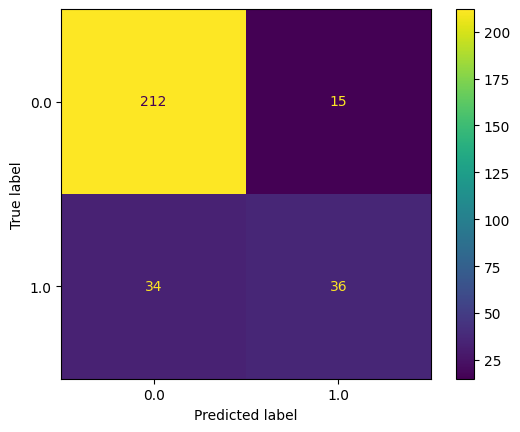

In [38]:
#evaluate the model
from sklearn.metrics import ConfusionMatrixDisplay


_ = ConfusionMatrixDisplay.from_estimator(model, data_test, target_test)

accuracy = model.score(data_test, target_test)
print(accuracy)



In [40]:
from sklearn.metrics import precision_recall_fscore_support

target_pred = model.predict(data_test)
p, r, f, _ = precision_recall_fscore_support(target_test, target_pred, average='binary')
print(f'Precision: {p}, recall: {r}, F1-score: {f}')

Precision: 0.7058823529411765, recall: 0.5142857142857142, F1-score: 0.5950413223140496


## Dealing with imbalanced data

In [42]:
from sklearn.utils import resample
#
# Create oversampled training data set for minority class
#
data_oversampled, target_oversampled = resample(data_train[target_train == 1],
                                        target_train[target_train == 1],
                                        replace=True,
                                        n_samples=target_train[target_train == 0].shape[0],
                                        random_state=123)
#
# Append the oversampled minority class to training data and related labels
#
data_balanced = pd.concat((data_train[target_train == 0], data_oversampled))
target_balanced = pd.concat((target_train[target_train == 0], target_oversampled))

In [44]:
print(target_balanced.mean())
print(data_balanced.shape)

0.5
(1096, 12)


0.8047138047138047


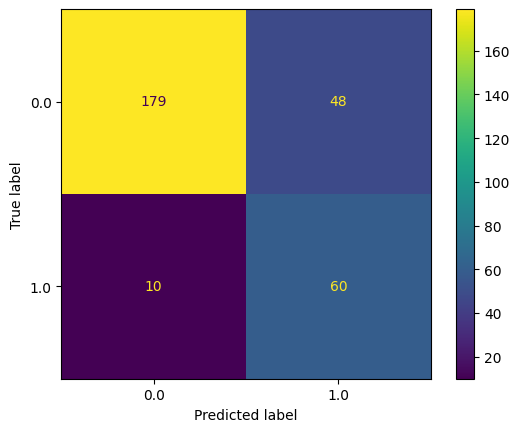

In [46]:
# train on all train data
model.fit(data_balanced, target_balanced)
_ = ConfusionMatrixDisplay.from_estimator(model, data_test, target_test)

accuracy = model.score(data_test, target_test)
print(accuracy)

In [48]:
from sklearn.metrics import precision_recall_fscore_support

target_pred = model.predict(data_test)
p, r, f, _ = precision_recall_fscore_support(target_test, target_pred, average='binary')
print(f'Precision: {p}, recall: {r}, F1-score: {f}')

Precision: 0.5555555555555556, recall: 0.8571428571428571, F1-score: 0.6741573033707865


# do model selection

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


best_model = None
max_score = 0
for model in [LogisticRegression(max_iter=500), RandomForestClassifier(n_estimators=300), 
              RandomForestClassifier(n_estimators=500),GradientBoostingClassifier(n_estimators=100),
             GradientBoostingClassifier(n_estimators=300)]:
    
    model = make_pipeline(preprocessor, model)
    model.fit(data_balanced, target_balanced)
    target_pred = model.predict(data_test)
    p, r, f, _ = precision_recall_fscore_support(target_test, target_pred, average='binary')
    score = f
    if score > max_score:
        max_score = score
        best_model = model

#todos
# add more models
# hyper parameter tuning
#feature importance 
# add more features and aggregate
# try it on full data as a sanity check

NameError: name 'make_pipeline' is not defined

In [68]:
print(max_score)
print(best_model)

0.7258064516129032
Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['woonvorm_2020',
                                                   'oplmet_2020', 'cf20m128',
                                                   'cs20m330',
                                                   'burgstat_2020']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['cf20m003', 'cf20m004',
                                                   'cf20m007', 'nettohh_f_2020',
                                                   'cf20m128', 'ch20m006',
                                                   'cs20m330', 'burgstat_2020',
                                                   'oplme

In [72]:
best_model.fit(data_balanced, target_balanced)
target_pred = best_model.predict(data_test)
target_pred = best_model.predict(data_test)
p, r, f, _ = precision_recall_fscore_support(target_test, target_pred, average='binary')
print(f'Precision: {p}, recall: {r}, F1-score: {f}')

Precision: 0.8333333333333334, recall: 0.6428571428571429, F1-score: 0.7258064516129032
